<a href="https://colab.research.google.com/github/dextopman/Youtube_data_analysis_2/blob/main/Youtube_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive

In [3]:
from google.colab import drive
drive.mount('/content/drive')

path = "/content/drive/MyDrive/UScomments.csv"

Mounted at /content/drive


In [4]:
comments = pd.read_csv(path, error_bad_lines=False)

comments.head()

<ipython-input-4-137b75a05518>:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  comments = pd.read_csv(path, error_bad_lines=False)
Skipping line 41589: expected 4 fields, saw 11
Skipping line 51628: expected 4 fields, saw 7
Skipping line 114465: expected 4 fields, saw 5

Skipping line 142496: expected 4 fields, saw 8
Skipping line 189732: expected 4 fields, saw 6
Skipping line 245218: expected 4 fields, saw 7

Skipping line 388430: expected 4 fields, saw 5

<ipython-input-4-137b75a05518>:1: DtypeWarning: Columns (2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  comments = pd.read_csv(path, error_bad_lines=False)


,video_id,comment_text,likes,replies
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0
4,XpVt6Z1Gjjo,trending 😉,3,0


In [5]:
comments.isnull().sum()

video_id         0
comment_text    25
likes            0
replies          0
dtype: int64

In [6]:
comments.dropna(inplace=True)

In [7]:
comments.isnull().sum()

video_id        0
comment_text    0
likes           0
replies         0
dtype: int64

## Performing Sentiment Analysis

In [8]:
!pip install textblob

In [9]:
from textblob import TextBlob

In [10]:
comments.head()

,video_id,comment_text,likes,replies
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0
4,XpVt6Z1Gjjo,trending 😉,3,0


In [11]:
TextBlob('MY FAN . attendance').sentiment.polarity

0.0

In [12]:
comments.shape

(691375, 4)

In [13]:
polarity = []

for comment in comments['comment_text']:
    try:
        polarity.append(TextBlob(comment).sentiment.polarity)
    except:
        polarity.append(0)

In [14]:
len(polarity)

691375

In [15]:
comments['polarity'] = polarity

In [16]:
comments.head(20)

,video_id,comment_text,likes,replies,polarity
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0,0.000000
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0,0.000000
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0,0.000000
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0,0.000000
4,XpVt6Z1Gjjo,trending 😉,3,0,0.000000
5,XpVt6Z1Gjjo,#1 on trending AYYEEEEE,3,0,0.000000
6,XpVt6Z1Gjjo,The end though 😭👍🏻❤️,4,0,0.000000
7,XpVt6Z1Gjjo,#1 trending!!!!!!!!!,3,0,0.000000
8,XpVt6Z1Gjjo,Happy one year vlogaversary,3,0,0.800000
9,XpVt6Z1Gjjo,You and your shit brother may have single hand...,0,0,-0.135714


## Performing Wordcloud Analysis

In [17]:
!pip install wordcloud

In [18]:
from wordcloud import WordCloud, STOPWORDS

In [19]:
set(STOPWORDS)

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'all',
 'also',
 'am',
 'an',
 'and',
 'any',
 'are',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 "can't",
 'cannot',
 'com',
 'could',
 "couldn't",
 'did',
 "didn't",
 'do',
 'does',
 "doesn't",
 'doing',
 "don't",
 'down',
 'during',
 'each',
 'else',
 'ever',
 'few',
 'for',
 'from',
 'further',
 'get',
 'had',
 "hadn't",
 'has',
 "hasn't",
 'have',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'hence',
 'her',
 'here',
 "here's",
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 "how's",
 'however',
 'http',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'k',
 "let's",
 'like',
 'me',
 'more',
 'most',
 "mustn't",
 'my',
 'myself',
 'no',
 'nor',
 'not',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'otherwise',
 'ought',
 'our',
 

In [20]:
filter1 = comments['polarity'] == 1

In [21]:
comments_positive = comments[filter1]

In [22]:
comments['comment_text']

0                         Logan Paul it's yo big day ‼️‼️‼️
1         I've been following you from the start of your...
2                        Say hi to Kong and maverick for me
3                                       MY FAN . attendance
4                                                trending 😉
                                ...                        
691395                                               Лучшая
691396    qu'est ce que j'aimerais que tu viennes à Roan...
691397                            Ven a mexico! 😍 te amo LP
691398                                      Islığı yeter...
691399    Kocham tą piosenkę😍❤❤❤byłam zakochana po uszy ...
Name: comment_text, Length: 691375, dtype: object

In [23]:
Positive_comments = ''.join(comments_positive['comment_text'])

In [24]:
Positive_comments

"yu are the bestPower is the disease.\xa0 Care is the cure.\xa0 Keep caring for yourself and others as best as you can.\xa0 This is life.YAS Can't wait to get it! I just need to sell my kidney so I can afford iPhone X :DThis is pricelessSummed up perfectlyThis is awesome. 1:20 XDDDDDDDDDBEST MOVIE EVER!!!Power is the disease.\xa0 Care is the cure.\xa0 Keep caring for yourself and others as best as you can.\xa0 This is life.The greatest movie about the greatest movie.It's Harry guys he's Spiderman best friendBest remake ever!Great review!awesome vlogSubscribe to me if Roman Atwood is the best youtuberI was attacked by a police dog once, \\n\\n\\n\\n\\n\\nthat was the best use of peanut butter ever.The best part of the movie was the creditsDO THE ORIGINAL STEPHEN KING'S IT!!!!!!!!!!!!!! 🤣🤣🤣🤣😃😃😃😃i downloaded and saw The Mummy 2017  in the best quality guys. here's the Iink https://twitter.com/akewdiudri/status/907980087676477442\\nyou must see too guys! that was awesome.Please say uncle t

In [25]:
wordcloud = WordCloud(stopwords=set(STOPWORDS)).generate(Positive_comments)

In [26]:
wordcloud

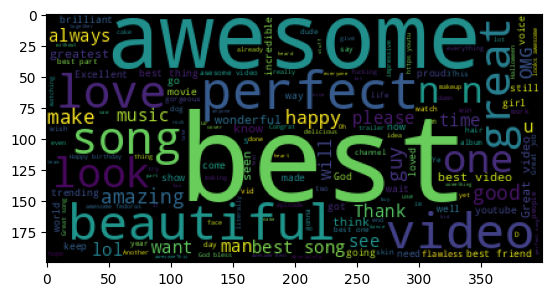

In [27]:
plt.imshow(wordcloud)

In [28]:
filter2 = comments['polarity'] == -1

In [29]:
comments_negative = comments[filter2]

In [30]:
negative_comments = ''.join(comments_negative['comment_text'])

In [31]:
wordcloud2 = WordCloud(stopwords=set(STOPWORDS)).generate(negative_comments)

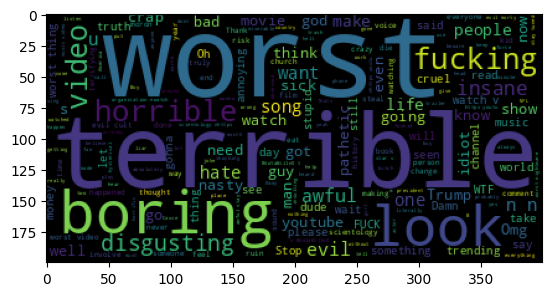

In [32]:
plt.imshow(wordcloud2)

## Performing Emoji Analysis

In [33]:
!pip install emoji==2.2.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.9/240.9 kB 3.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for emoji: filename=emoji-2.2.0-py3-none-any.whl size=234911 sha256=69507ebb385882d29b3cdc507e0e63f045a7a5e36e577f98643eb76923ed3c56
  Stored in directory: /root/.cache/pip/wheels/02/3d/88/51a592b9ad17e7899126563698b4e3961983ebe85747228ba6
Successfully built emoji


In [34]:
import emoji

In [35]:
comments['comment_text'].head(10)

0                    Logan Paul it's yo big day ‼️‼️‼️
1    I've been following you from the start of your...
2                   Say hi to Kong and maverick for me
3                                  MY FAN . attendance
4                                           trending 😉
5                              #1 on trending AYYEEEEE
6                                 The end though 😭👍🏻❤️
7                                 #1 trending!!!!!!!!!
8                          Happy one year vlogaversary
9    You and your shit brother may have single hand...
Name: comment_text, dtype: object

In [36]:
comment = "The end though 😭👍🏻❤️"

In [37]:
emoji_list = []

for char in comment:
  if char in emoji.EMOJI_DATA:
    emoji_list.append(char)

In [38]:
emoji_list

['😭', '👍', '🏻', '❤']

In [39]:
all_emojis_list = []

for comment in comments['comment_text'].dropna():
    for char in comment:
        if char in emoji.EMOJI_DATA:
            all_emojis_list.append(char)

In [40]:
all_emojis_list[0:20]

['‼',
 '‼',
 '‼',
 '😉',
 '😭',
 '👍',
 '🏻',
 '❤',
 '😍',
 '💋',
 '💙',
 '👍',
 '👈',
 '😂',
 '🔥',
 '😂',
 '😂',
 '😂',
 '😂',
 '👻']

In [41]:
!pip install counter

  Preparing metadata (setup.py) ... done
  Created wheel for counter: filename=Counter-1.0.0-py3-none-any.whl size=5393 sha256=1bba03cec93969b9a6e3fba336842358c19f59797d3440c98946b145587f1aca
  Stored in directory: /root/.cache/pip/wheels/e3/02/6d/d5c0838427a060718c6060ae4d24da95a0e0df0d7a3dab8040
Successfully built counter


In [42]:
from collections import Counter

In [43]:
Counter(all_emojis_list).most_common(15)

[('😂', 36987),
 ('😍', 33453),
 ('❤', 31119),
 ('🔥', 8694),
 ('😭', 8398),
 ('👏', 5719),
 ('😘', 5545),
 ('👍', 5476),
 ('💖', 5359),
 ('💕', 5147),
 ('♥', 4909),
 ('😊', 3596),
 ('🏻', 3438),
 ('💜', 3429),
 ('😬', 3381)]

In [44]:
Counter(all_emojis_list).most_common(10)[0][0]

'😂'

In [45]:
Counter(all_emojis_list).most_common(10)[1][0]

'😍'

In [46]:
emojis = [Counter(all_emojis_list).most_common(10)[i][0] for i in range(10)]

In [47]:
emojis

['😂', '😍', '❤', '🔥', '😭', '👏', '😘', '👍', '💖', '💕']

In [48]:
Counter(all_emojis_list).most_common(10)[0][1]

36987

In [49]:
freq = [Counter(all_emojis_list).most_common(10)[i][1] for i in range(10)]

In [50]:
freq

[36987, 33453, 31119, 8694, 8398, 5719, 5545, 5476, 5359, 5147]

In [51]:
import plotly.graph_objs as go
from plotly.offline import iplot


In [52]:
Trace = go.Bar(x=emojis, y=freq)

In [55]:
iplot([Trace])

